In [1]:
!unzip '/Users/manaswini/Desktop/NeuroNexus/SALES PREDICTION USING PYTHON/Sales dataset.zip'

Archive:  /Users/manaswini/Desktop/NeuroNexus/SALES PREDICTION USING PYTHON/Sales dataset.zip
  inflating: car_purchasing.csv      


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
!pip install chardet

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 5.1 MB/s eta 0:00:00


In [5]:
import chardet

In [8]:
with open('/Users/manaswini/Desktop/NeuroNexus/SALES PREDICTION USING PYTHON/car_purchasing.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

In [10]:
data = pd.read_csv('/Users/manaswini/Desktop/NeuroNexus/SALES PREDICTION USING PYTHON/car_purchasing.csv', encoding=encoding)

DATA PREPROCESSING

In [11]:
data.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [12]:
data.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [14]:
data.shape

(500, 9)

In [15]:
data.columns.unique()

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [16]:
data.isna().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

Drop Unwanted Columns or Labels

In [17]:
data.drop('customer name', axis=1, inplace=True)

In [18]:
data.drop('customer e-mail', axis=1, inplace=True)

In [19]:
data['country'].unique()

array(['Bulgaria', 'Belize', 'Algeria', 'Cook Islands', 'Brazil',
       'Liberia', 'Syria', 'Czech Republic', 'Armenia', 'Somalia',
       'Sint Maarten', 'Greenland', 'Nicaragua', 'Palestine, State of',
       'United Arab Emirates', 'Gabon', 'Tokelau', 'Portugal', 'Chad',
       'Iraq', 'Sudan', 'Angola', 'Nigeria', 'Madagascar', 'Macedonia',
       'Oman', 'Colombia', 'Namibia', 'Denmark', 'Dominican Republic',
       'Costa Rica', 'Botswana', 'Saint Pierre and Miquelon', 'France',
       'Senegal', 'Cambodia', 'Suriname', 'Turkey', 'Ethiopia',
       'French Guiana', 'Bhutan', 'Georgia', 'Mozambique', 'Nauru',
       'Timor-Leste', 'Djibouti', 'Argentina', 'Taiwan', 'Åland Islands',
       'Turks and Caicos Islands', 'Samoa', 'Vanuatu', 'Mongolia',
       'Sri Lanka', 'Guinea-Bissau', 'Egypt', 'Slovenia', 'Benin',
       'Cape Verde', 'Paraguay', 'Laos', 'Iceland', 'Viet Nam',
       'Marshall Islands', 'Germany', 'Kyrgyzstan', 'Mauritius', 'Gambia',
       'Reunion', 'Jordan', 'S

As there are multiple values in country column drop it

In [20]:
data.drop('country', axis=1, inplace=True)

In [21]:
data.head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


Data Visualization


Age vs car purchase amount

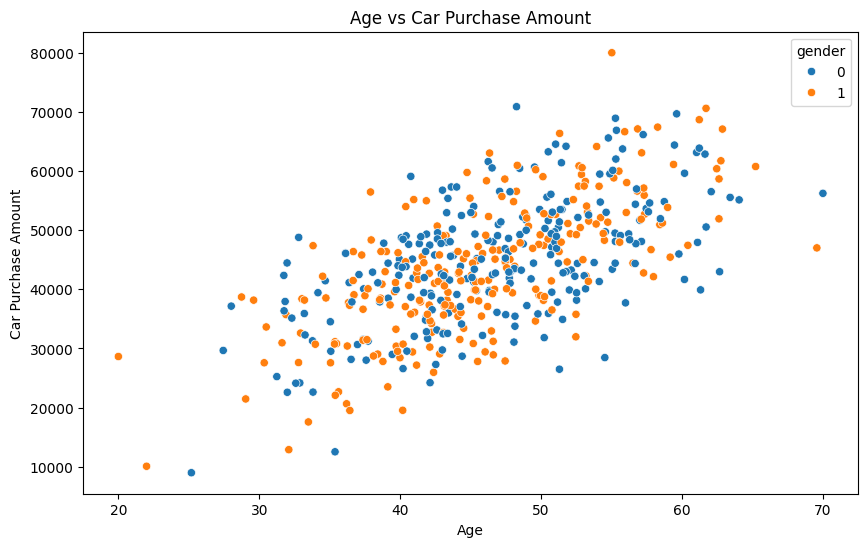

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='car purchase amount', hue='gender', data=data)
plt.title('Age vs Car Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Car Purchase Amount')
plt.show()

gender vs Average Anual salary

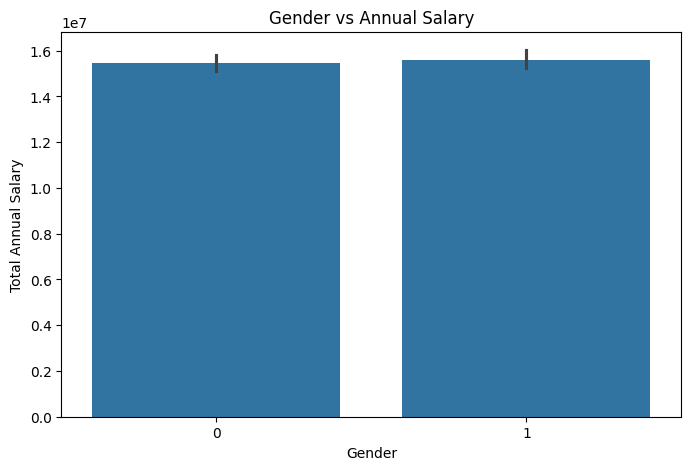

In [23]:
plt.figure(figsize=(8, 5))
sns.barplot(x='gender', y='annual Salary', data=data, estimator=sum)
plt.title('Gender vs Annual Salary')
plt.xlabel('Gender')
plt.ylabel('Total Annual Salary')
plt.show()

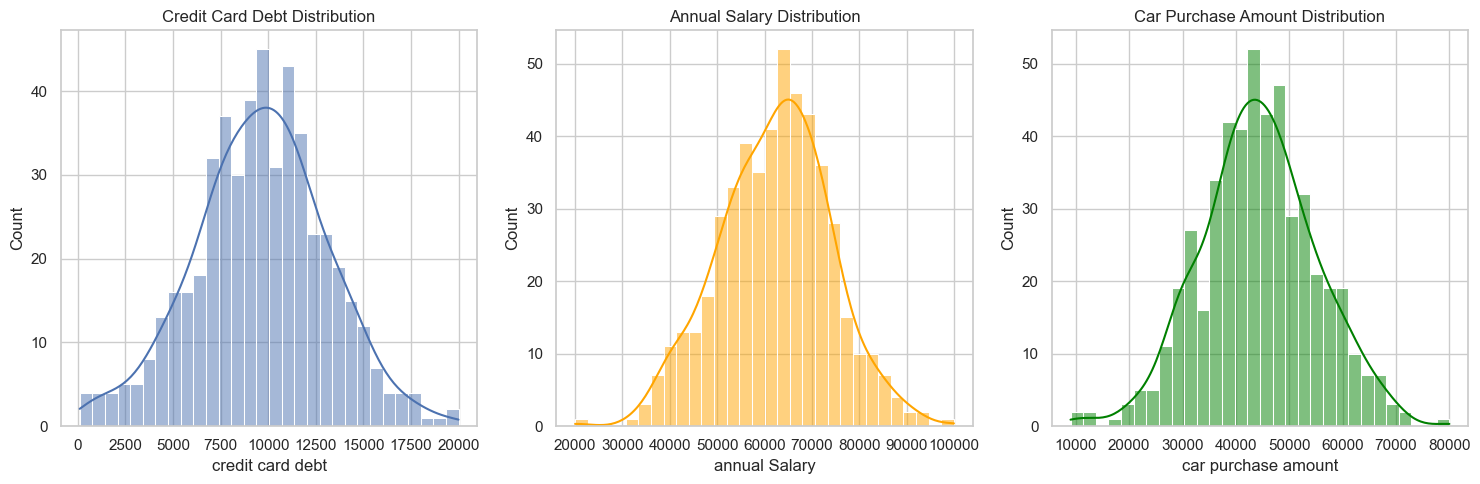

In [24]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(data['credit card debt'], bins=30, kde=True)
plt.title('Credit Card Debt Distribution')
plt.subplot(1, 3, 2)
sns.histplot(data['annual Salary'], bins=30, kde=True, color='orange')
plt.title('Annual Salary Distribution')
plt.subplot(1, 3, 3)
sns.histplot(data['car purchase amount'], bins=30, kde=True, color='green')
plt.title('Car Purchase Amount Distribution')
plt.tight_layout()
plt.show()

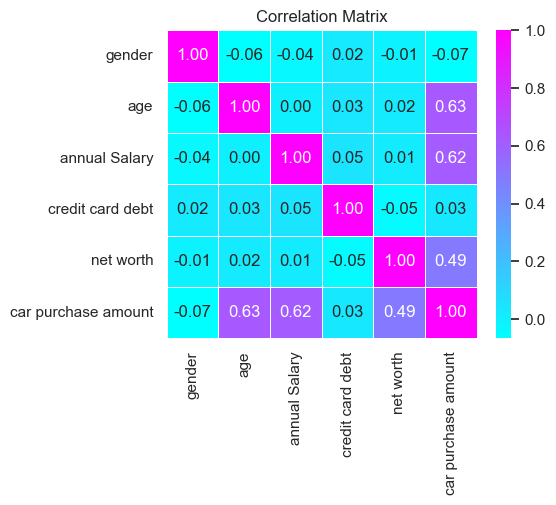

In [25]:
corr_matrix = data.corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr_matrix, annot=True, cmap='cool', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Split the data

In [26]:
X = data.drop('car purchase amount', axis=1)
y = data['car purchase amount']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

TWO MODELS ARE USED FOR PREDICTION AND COMPARATIVE ANALYSIS
They are:-
> Support vector Machine

> XG boost


In [29]:
svm_model = SVR(kernel='linear')
svm_model.fit(X_train_scaled, y_train)


SVR(kernel='linear')

In [30]:
svm_predictions = svm_model.predict(X_test_scaled)

In [31]:
print("Support Vector Machines (SVM) - Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, svm_predictions))
print("R-squared:", r2_score(y_test, svm_predictions))
print("\n")

Support Vector Machines (SVM) - Regression:
Mean Squared Error: 103326242.74103124
R-squared: 0.03165577228553518




In [32]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [33]:
xgb_predictions = xgb_model.predict(X_test)

In [34]:
print("XGBoost Regressor:")
print("Mean Squared Error:", mean_squared_error(y_test, xgb_predictions))
print("R-squared:", r2_score(y_test, xgb_predictions))

XGBoost Regressor:
Mean Squared Error: 5090716.107287901
R-squared: 0.9522912531545314


NOTE:-Accuracy is generally not used as an evaluation metric for regression tasks because it is more suitable for classification problems where the goal is to correctly classify instances into different categories. In regression, the predicted values are continuous, making it challenging to define accuracy in the same way.


In [46]:
threshold = 0.1
svm_class_predictions = [1 if pred >= threshold else 0 for pred in svm_predictions]

In [42]:
print("Support Vector Machines (SVM) - Classification Report:")
print(classification_report(y_test > threshold, svm_class_predictions))

Support Vector Machines (SVM) - Classification Report:
              precision    recall  f1-score   support

        True       1.00      1.00      1.00       150

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



In [43]:
xgb_class_predictions = [1 if pred >= threshold else 0 for pred in xgb_predictions]

In [45]:
print("XGBoost Regressor - Classification Report:")
print(classification_report(y_test > threshold, xgb_class_predictions))

XGBoost Regressor - Classification Report:
              precision    recall  f1-score   support

        True       1.00      1.00      1.00       150

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

